In [2]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.visualization import *
from math import sqrt, pi

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

## Quick Exercises 1 

### 1. Verify that |+⟩ and |−⟩ are in fact eigenstates of the X-gate.

First we need to define the |+⟩ and |−⟩ states in 2 different qubits. I will initalize the first qubit to 1 and the second to 0.

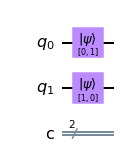

In [3]:
qCirc1 = QuantumCircuit(2, 2)
oneInit = [0, 1]
qCirc1.initialize(oneInit, 0)
zeroInit = [1, 0]
qCirc1.initialize(zeroInit, 1)
qCirc1.draw('mpl')

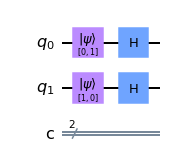

In [4]:
qCirc1.h(0)
qCirc1.h(1)
qCirc1.draw('mpl')

Now the first qubit is in the |-⟩ and the second qubit is in the |+⟩ state. We can now apply the X gates. If the |+⟩ and |−⟩ states are really eigenstates then a reapplication of the Hadamard gates and a measurement should give |0⟩ and |1⟩.

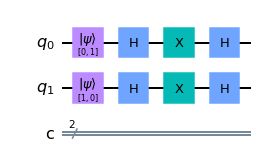

In [5]:
qCirc1.x([0,1])
qCirc1.h([0,1])
qCirc1.draw('mpl')

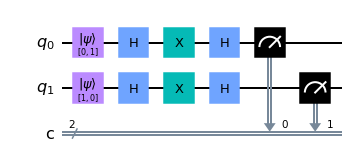

In [6]:
qCirc1.measure(0, 0)
qCirc1.measure(1, 1)
qCirc1.draw('mpl')

#### Simulating this circuit on QASM


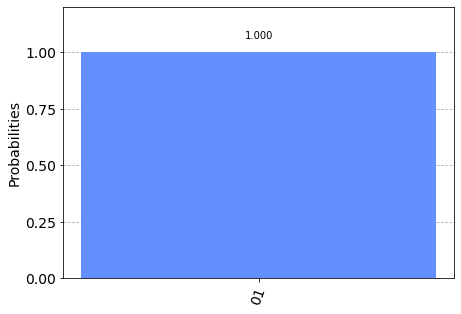

In [7]:
nativeSim = Aer.get_backend('qasm_simulator')
result = execute(qCirc1, backend = nativeSim).result()
plot_histogram(result.get_counts(qCirc1))

This proves the property we were looking for

### 4. Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere.

The eigenstates of the Y gate will simply be the y-basis vectors because the are unaffected by a rotation of $\pi$ about the y-axis. These are 
$$ \frac{1}{\sqrt{2}}(|0⟩ + i|1⟩) \text{ and }   \frac{1}{\sqrt{2}}(|0⟩ - i|1⟩) $$

### Experiment with Pauli Y Gate

The following experiment is to test out the x-axis basis vectors under a y-axis transformation

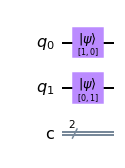

In [30]:
qCircTest = QuantumCircuit(2, 2);
qCircTest.initialize(zeroInit, 0);
qCircTest.initialize(oneInit, 1)
qCircTest.draw('mpl')

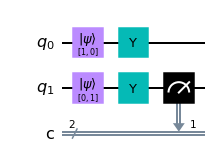

In [31]:
qCircTest.y([0,1])
qCircTest.measure([0, 1], [0, 1])
qCircTest.draw('mpl')

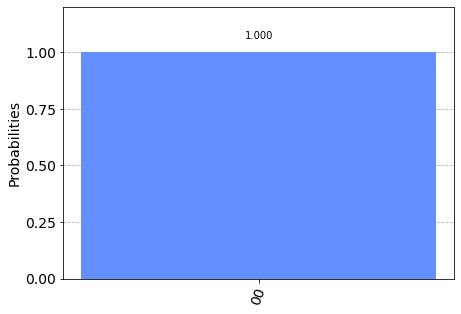

In [32]:
result = execute(qCircTest, backend = nativeSim, shots = 1024).result()
plot_histogram(result.get_counts(qCircTest))

## Quick Exercises 2

### 2. Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate.

Here we will define another circuit with 1 qubit and show that a HZH transforms |0⟩ to |1⟩ and |1⟩ and |0⟩. 

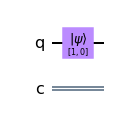

In [16]:
qCirc2 = QuantumCircuit(1, 1)
qCirc2.initialize(zeroInit, 0)
qCirc2.draw('mpl')

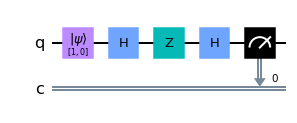

In [17]:
qCirc2.h(0)
qCirc2.z(0)
qCirc2.h(0)
qCirc2.measure(0, 0)
qCirc2.draw('mpl')

#### Simulating this circuit on QASM


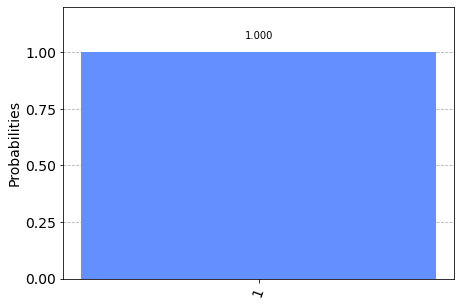

In [18]:
result2 = execute(qCirc2, backend = nativeSim, shots = 1024).result()
plot_histogram(result2.get_counts(qCirc2))

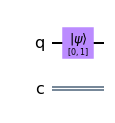

In [19]:
qCirc2 = QuantumCircuit(1, 1)
qCirc2.initialize(oneInit, 0)
qCirc2.draw('mpl')

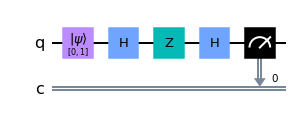

In [20]:
qCirc2.h(0)
qCirc2.z(0)
qCirc2.h(0)
qCirc2.measure(0, 0)
qCirc2.draw('mpl')

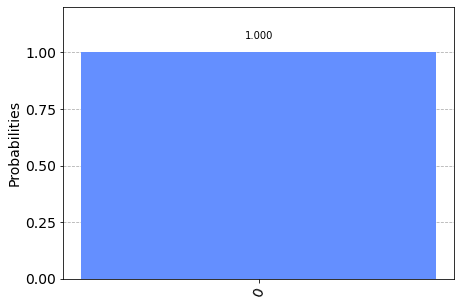

In [21]:
result2 = execute(qCirc2, backend = nativeSim, shots = 1024).result()
plot_histogram(result2.get_counts(qCirc2))

### 3. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase).

As we saw before, the Y gate does not affect the |0⟩ and |1⟩ basis vectors. Since we can ignore the global phase, we can take $-i$ outside. This yeilds the matrix


$$ \sigma_Y = -i \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} $$

By shear trial and error the matrix given is ZX.

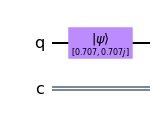

In [22]:
qCirc23 = QuantumCircuit(1, 1)
qCirc23.initialize([1/sqrt(2), 1j/sqrt(2)], 0)
qCirc23.draw('mpl')

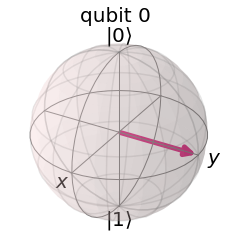

In [23]:
svSim = Aer.get_backend('statevector_simulator')
svResult = execute(qCirc23, backend = svSim, shots = 1024).result()
stateVectorBefore = svResult.get_statevector()
plot_bloch_multivector(stateVectorBefore)

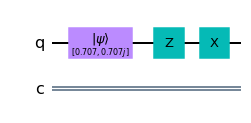

In [24]:
qCirc23.z(0)
qCirc23.x(0)
qCirc23.draw('mpl')

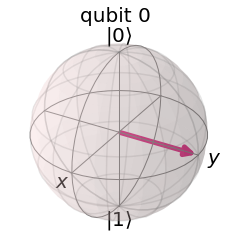

In [25]:
svResult = execute(qCirc23, backend = svSim, shots = 1024).result()
stateVectorAfter = svResult.get_statevector()
plot_bloch_multivector(stateVectorAfter)

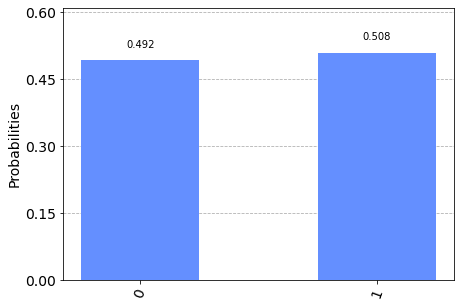

In [26]:
qCirc23.measure(0, 0)
result = execute(qCirc23, backend = nativeSim, shots = 1024).result()
plot_histogram(result.get_counts(qCirc23))

## Quick Exercises 3

### 1. If we initialise our qubit in the state |+⟩, what is the probability of measuring it in state |−⟩?

The probability would be 0.

### 2. Use Qiskit to display the probability of measuring a |0⟩ qubit in the states |+⟩ and |−⟩

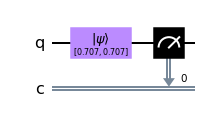

In [36]:
qCirc32 = QuantumCircuit(1, 1) 
qCirc32.initialize([1/sqrt(2), 1/sqrt(2)], 0)
qCirc32.measure(0, 0)
qCirc32.draw('mpl')

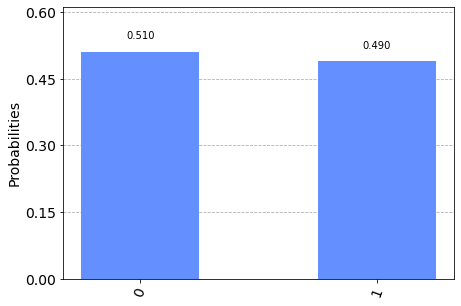

In [39]:
result = execute(qCirc32, backend = nativeSim, shots = 1024).result()
plot_histogram(result.get_counts(qCirc32))

### 3. Try to create a function that measures in the Y-basis.

To do this we would need to 
1. Convert Y-basis into Z-basis (this can simply be done by rotating the x-axis by $ \pi/2$ )
2. Use Qiskit measurement to measure in Z-basis
3. Convert back into Y-basis (rotate the x-axis by $ -\pi/2$)

In [43]:
def measure_y(qc, qubit, cbit):
    # STEP 1
    qc.sdg(qubit)
    qc.h(qubit)
    
    # STEP 2
    qc.measure(qubit, cbit)
    
    # STEP 3
    qc.h(qubit)
    qc.s(qubit)

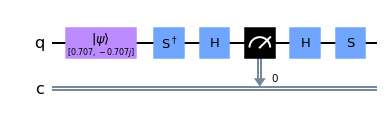

In [44]:
circuit = QuantumCircuit(1, 1)
outwardInit = [1/sqrt(2), -1j/sqrt(2)]
circuit.initialize(outwardInit, 0)
measure_y(circuit, 0 ,0)
circuit.draw('mpl')

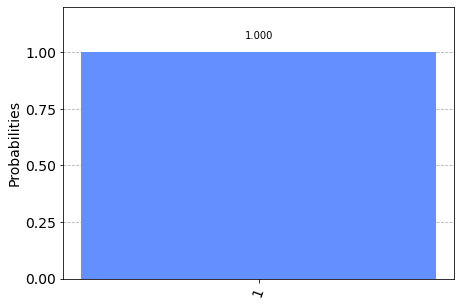

In [45]:
result = execute(circuit, backend = nativeSim, shots = 1024).result()
plot_histogram(result.get_counts(circuit))

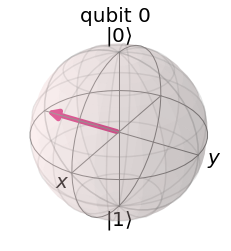

In [47]:
svResult = execute(circuit, backend = svSim, shots = 1024).result()
plot_bloch_multivector(svResult.get_statevector())